# Real-time visualization of Raspberry Shake using Seedlink and Obspy

In [1]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import numpy as np
from collections import deque
import obspy
from obspy.clients.seedlink.easyseedlink import create_client
# %matplotlib widget

Received new data:
 AM.R8E9F.00.EHZ | 2022-06-27T18:47:59.685000Z - 2022-06-27T18:48:01.735000Z | 100.0 Hz, 206 samples


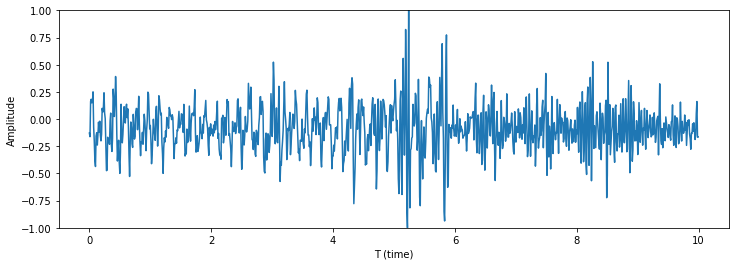

In [ ]:
num = 1000
dt = 0.01
x = np.arange(0, num, 1) * dt
waveform = deque([0] * num, maxlen=num)
# normalize = lambda x: (x-np.mean(x))/np.std(x)
normalize = lambda x: 2*(x-np.min(x))/(np.max(x)-np.min(x))-1.0

fig, ax = plt.subplots(1,1, figsize=(12,4))
line, = ax.plot(x, np.array(waveform))
ax.set_ylim([-1, 1])
ax.set_xlabel("T (time)")
ax.set_ylabel("Amplitude")

def update(trace):
    
    waveform.extendleft(list(trace.data))
    line.set_ydata(normalize(np.array(waveform)))
    
    clear_output(wait=True)
    print(f'Received new data:\n {trace}')
    display(fig)
    
def error():
    pass

# ip = "dhcp-74-224.caltech.edu"
ip = "192.168.1.21"
network_code = "AM"
station_code = "R8E9F"
channel_code = "EHZ"
url = f"{ip}:18000"

client = create_client(url, on_data=update, on_seedlink_error=error)
client.select_stream(network_code, station_code, channel_code)
client.run()